<a href="https://colab.research.google.com/github/harakenken22/diveintocode-ml/blob/master/week4_pre_rec_work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 機械学習入門授業前課題1 アヤメの分類
 -----

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [30]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.DataFrame(data.target_names, columns=['species_name'])
Y_target = pd.DataFrame(data.target, columns=['species'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
Y

,species_name
0,setosa
1,versicolor
2,virginica


In [32]:
Y_target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [33]:
df = pd.merge(X, Y_target, left_index=True , right_index=True)

In [94]:
X_length_origin = df.loc[:, ['sepal length (cm)', 'petal length (cm)', 'species']]
X_length_origin

,sepal length (cm),petal length (cm),species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [35]:
length_origin = df.loc[:, ['sepal length (cm)', 'petal length (cm)']]
length_origin

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


pandas.DataFrameの列をインデックス（行名）に割り当てるset_index
https://note.nkmk.me/python-pandas-set-index/

In [36]:
Y_target = Y_target.query('species == [1, 2]')
Y_target

,species
50,1
51,1
52,1
53,1
54,1
...,...
145,2
146,2
147,2
148,2


In [37]:
Y_spices = X_length_origin.query('species == [1, 2]')
Y_spices

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


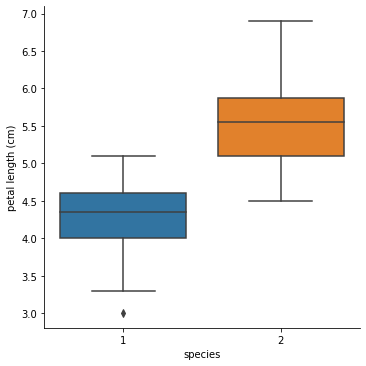

In [38]:
sns.catplot(x='species', y='petal length (cm)', data=Y_spices, kind='box')

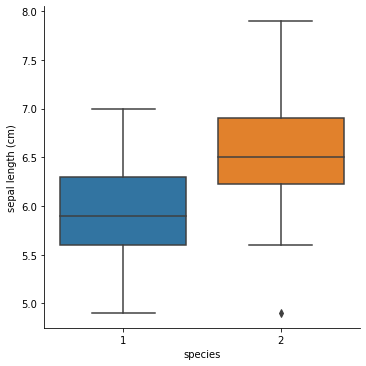

In [39]:
sns.catplot(x='species', y='sepal length (cm)', data=Y_spices, kind='box')

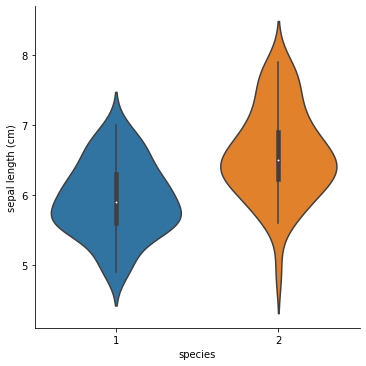

In [40]:
sns.catplot(x='species', y='sepal length (cm)', data=Y_spices, kind='violin')

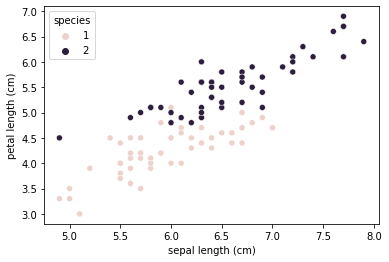

In [41]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=Y_spices, hue='species')

【問題4】前処理・標準化
---
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。
sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


《実際の問題での前処理は？》
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

標準化の方法：
https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

```
ss = preprocessing.StandardScaler()

# print(ss.fit_transform(l))
# ValueError: Expected 2D array, got 1D array instead:

l_2d_standardization = ss.fit_transform(l_2d)

print(l_2d_standardization)
# [[-1.22474487 -1.22474487 -1.22474487]
#  [ 0.          0.          0.        ]
#  [ 1.22474487  1.22474487  1.22474487]]

print(type(l_2d_standardization))
# <class 'numpy.ndarray'>
````

In [42]:
Y_spices

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [43]:
from sklearn import preprocessing

#標準化の実施
ss = preprocessing.StandardScaler()

species_standardization = ss.fit_transform(Y_speces.loc[:, ['sepal length (cm)', 'petal length (cm)']])

species_standardization

type(species_standardization)


numpy.ndarray

In [44]:
species_standardization.shape #標準化完成

(100, 2)

【問題5】学習と推定
===
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。


機械学習K近傍法URL:
https://qiita.com/fujin/items/128ed7188f7e7df74f2c

In [45]:
from sklearn.model_selection import train_test_split #テストデータと訓練データを分けるためのメソッド
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #近傍法のツールの読み込み


X_train, X_test, Y_train, Y_test = train_test_split(species_standardization, Y_spices['species']) #トレーニングデータとテストデータに分ける
Y_train_ndarry = np.array(Y_train)

Y_train_ndarry = Y_train_ndarry.reshape(-1)


In [46]:
type(X_train) #標準化

numpy.ndarray

In [47]:
type(X_test)

numpy.ndarray

In [48]:
type(Y_train_ndarry)

numpy.ndarray

k-近傍法のモデルを作成
===
```
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
```

>パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [49]:
#パラメーターが6のとき
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, Y_train)
Y_pred = knn_6.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.96

In [50]:
#パラメーターが１のとき
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, Y_train)
Y_pred = knn_1.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.96

In [112]:
#パラメーターが３のとき
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, Y_train)
Y_pred = knn_3.predict(X_test)
accurancy_k = metrics.accuracy_score(Y_test, Y_pred)

【問題6】評価
---
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。
- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる


sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation
sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation
sklearn.metrics.recall_score — scikit-learn 0.21.3 
sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation
sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation


In [52]:
#precitionスコアの測定(精度評価)
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average='micro')

0.92

In [53]:
#recallスコアの測定
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average='micro')

0.92

In [54]:
#f1スコアの測定
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

0.92

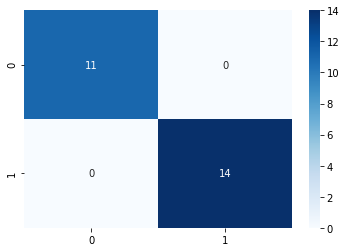

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

4種類の指標値の意味について簡単に調査して文章でまとめる

Precision_score:
---

>適合率（precision）は、陽性と予測されたサンプルのうち正解したサンプルの割合。PPV（positive predictive value）とも呼ばれる。
$
\text{precision} = \frac{TP}{TP + FP}
$

関数precision_score()で算出できる。


Recall Score:
---

>再現率（recall）は実際に陽性のサンプルのうち正解したサンプルの割合。sensitivityやhit rate, TPR（true positive rate, 真陽性率）などとも呼ばれる。
$
\text{recall} = \frac{TP}{TP + FN}
$

関数recall_score()で算出できる。


F1Score:
---
>F1値（F1-measure）は適合率と再現率の調和平均。 単純にF値（F-measure, F-score）と呼ばれることもある。
$
\text{F1-measure} = \frac{2 * \text{precision} * \text{recall}}{\text{precision} + \text{recall}} = \frac{2 * TP}{2 * TP + FP + FN}
$

>関数f1_score()で算出できる。


Condusion Matrix:
---

>混同行列（confusion matrix）はクラス分類問題の結果を「実際のクラス」と「予測したクラス」を軸にしてまとめたもの。




【問題7】可視化
----
>評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

````
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
````

In [70]:
print (Y_test.shape)

(25,)


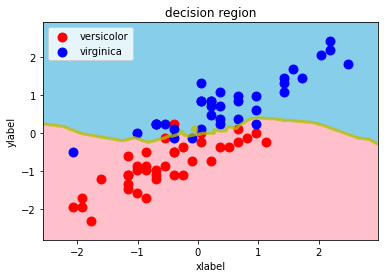

In [73]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', 
                    ylabel='ylabel', target_names=['versicolor', 'virginica']):
     # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
    
    
decision_region(X_train, 
                Y_train_ndarry, 
                knn_6, step=0.01, 
                title='decision region', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

【問題8】他の手法の学習
----
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

1.最近傍法は上記で実施
---

2.ロジスティック回帰分析
---

```
# KNeighborsClassifier
  knr = KNeighborsRegressor(n_neighbors=k)
  knr.fit(X_train, Y_train)

  # 予測　
  Y_pred = knr.predict(X_test)
 ````
 参考URL:
 https://qiita.com/fujin/items/128ed7188f7e7df74f2c

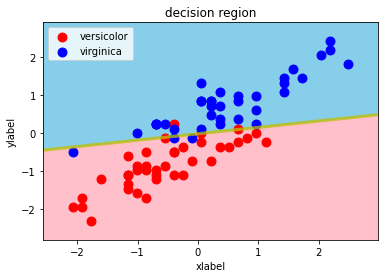

1.0
1.0
1.0
[[11  0]
 [ 0 14]]


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_regression = lr.predict(X_test)
# metrics.accuracy_score(Y_test, Y_pred_regression)

decision_region(X_train, Y_train_ndarry, lr, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

print(precision_score(Y_test, Y_pred_regression, average='micro'))

print(recall_score(Y_test, Y_pred_regression, average='micro'))
print(f1_score(Y_test, Y_pred_regression, average='micro'))
print(confusion_matrix(Y_test, Y_pred_regression))
accuracy_log = accuracy_score(Y_test, Y_pred_regression)

3.SVM サポートベクターマシン
---
PythonでSVMを実装する方法を現役エンジニアが解説【初心者向け】 参考URL: https://techacademy.jp/magazine/34353


124    2
143    2
65     1
96     1
123    2
127    2
111    2
84     1
102    2
75     1
Name: species, dtype: int64
[2 2 1 1 2 2 2 1 2 1]


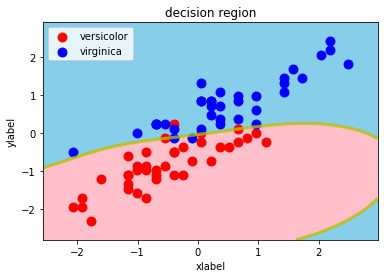

1.0
1.0
1.0
[[11  0]
 [ 0 14]]


In [116]:
from sklearn.svm import SVC
model = SVC(gamma='scale')
model.fit(X_train, Y_train)
Y_pred_SVM = model.predict(X_test)

print(Y_test[:10])
print(Y_pred[:10])
decision_region(X_train, Y_train_ndarry, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

print(precision_score(Y_test, Y_pred_SVM, average='micro'))
print(recall_score(Y_test, Y_pred_SVM, average='micro'))
print(f1_score(Y_test, Y_pred_SVM, average='micro'))
print(confusion_matrix(Y_test, Y_pred_SVM))
accuracy_SVM = accuracy_score(Y_test, Y_pred_SVM)

4.決定木分析
---
参考URL: https://qiita.com/Hawaii/items/53efe3e96b1171ebc7db
描画

````
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"],#編集するのはここ  
                     class_names=["False","True"],#編集するのはここ（なぜFase,Trueの順番なのかは後程触れます）  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
````


In [117]:
print(Y_spices.loc[:,['species']])

     species
50         1
51         1
52         1
53         1
54         1
..       ...
145        2
146        2
147        2
148        2
149        2

[100 rows x 1 columns]


In [118]:
from sklearn import tree #決定木のメソッドを呼び起こす
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image

#データ分割
Y_train_cart = X_length_origin.loc[:,['species']]
X_train_cart = X_length_origin.loc[:,['sepal length (cm)', 'petal length (cm)']]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_train_cart, Y_train_cart)
print(X_test_dt)



     sepal length (cm)  petal length (cm)
17                 5.1                1.4
114                5.8                5.1
105                7.6                6.6
68                 6.2                4.5
138                6.0                4.8
60                 5.0                3.5
86                 6.7                4.7
97                 6.2                4.3
133                6.3                5.1
143                6.8                5.9
98                 5.1                3.0
79                 5.7                3.5
149                5.9                5.1
28                 5.2                1.4
27                 5.2                1.5
130                7.4                6.1
106                4.9                4.5
63                 6.1                4.7
10                 5.4                1.5
25                 5.0                1.6
65                 6.7                4.4
44                 5.1                1.9
70                 5.9            

0.8947368421052632
0.8947368421052632
0.8947368421052632
[[12  0  0]
 [ 0 11  3]
 [ 0  1 11]]


Text(91.68, 0.5, 'true value')

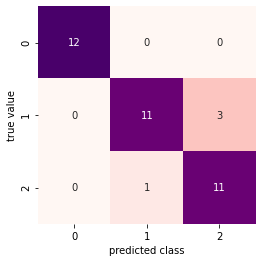

In [119]:
clf = DecisionTreeClassifier()
#トレーニング
clf.fit(X_train_dt, Y_train_dt)
#予測
clf_pred = clf.predict(X_test_dt)

print(precision_score(Y_test_dt, clf_pred, average='micro'))
print(recall_score(Y_test_dt, clf_pred, average='micro'))
print(f1_score(Y_test_dt, clf_pred, average='micro'))
print(confusion_matrix(Y_test_dt, clf_pred))
accuracy_dt = accuracy_score(Y_test_dt, clf_pred)
mat = confusion_matrix(Y_test_dt, clf_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

5.ランダムフォレスト
---

参考文献: https://qiita.com/koichi_hiphopdream/items/f01d195cdc34acb5f879

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix


#データの分割
train_x = X_length_origin.drop(['species'], axis=1) # 説明変数のみにする
train_y = X_length_origin['species'] # 正解クラス
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

y_pred = random_forest.predict(test_x)

accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))
print(precision_score(test_y, y_pred, average='micro'))
print(recall_score(test_y, y_pred, average='micro'))
print(f1_score(test_y, y_pred, average='micro'))
print(confusion_matrix(test_y, y_pred, ))


Accuracy: 1.0
1.0
1.0
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Text(91.68, 0.5, 'true value')

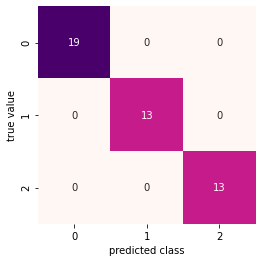

In [121]:
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [127]:
listA = [accuracy_random_forest]
listB = [accuracy_log]
listC = [accuracy_dt]
listD = [accurancy_k]
df_accurancy = pd.DataFrame(listA, columns=['Accurancy_random_forest'])
df_accurancy['accuracy_log'] = listB
df_accurancy['accuracy_df'] = listC
df_accurancy['accuracy_k'] = listD
df_accurancy

,Accurancy_random_forest,accuracy_log,accuracy_df,accuracy_k
0,1.0,1.0,0.894737,0.92


まとめ：
---
上記に結果からIrisの分析にはランダムフォレストまたはロジスティック回帰分析を用いた分析手法を用いることが望ましいという結論になった。